In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
data = """
train: /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train
val: /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/val

nc: 7
names: ['Car',Two Wheeler', 'Auto', 'Bus', 'Truck']
"""

path = '/kaggle/working/dataset.yaml'


with open(path, 'w') as file:
    file.write(data)

print(f"dataset.yaml has been saved to: {path}")k

dataset.yaml has been saved to: /kaggle/working/dataset.yaml


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 15.6 MB/s eta 0:00:00a 0:00:01


In [3]:
from ultralytics import YOLO

# Load a YOLOv8 model (e.g., YOLOv8s)
model = YOLO('yolov8x.pt')  # Pretrained weights for YOLOv8 small model

# Train the model
model.train(
    data='/kaggle/working/dataset.yaml',  # Path to the dataset configuration file
    imgsz=640,  # Image size
    batch=16,  # Batch size
    epochs=100,  # Number of epochs
    cache=True,  # Cache the dataset for faster training
    project='runs/train',  # Directory where training runs are saved
    name='exp',  # Name of the specific training run
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:00<00:00, 319MB/s] 


Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=runs/train, name=exp, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 4.06MB/s]
2024-12-03 06:38:51,026	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-12-03 06:38:52,164	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 69.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels/train... 735 images, 6 backgrounds, 3 corrupt: 100%|██████████| 738/738 [00:06<00:00, 109.84it/s]

train: WARNING ⚠️ /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (453).jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (453).jpg'
train: WARNING ⚠️ /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (837).jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (837).jpg'
train: WARNING ⚠️ /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (857).jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (857).jpg'


train: WARNING ⚠️ Cache directory /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 735/735 [00:04<00:00, 176.88it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels/val... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:01<00:00, 102.07it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 185/185 [00:01<00:00, 159.08it/s]


Plotting labels to runs/train/exp/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/exp
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      13.1G     0.9022      1.247     0.9675        463        640: 100%|██████████| 46/46 [00:57<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

                   all        185       1980      0.256      0.524      0.278       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      13.5G      0.864     0.6667     0.9431        544        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        185       1980       0.57      0.501      0.502      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      13.2G     0.8787      0.618      0.955        339        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        185       1980      0.524      0.504      0.465      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      13.1G     0.8521     0.5807     0.9452        597        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.507      0.542      0.482      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.4G     0.8553      0.578     0.9606        407        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.631      0.419      0.469      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.9G     0.8307     0.5449     0.9481        407        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        185       1980      0.738      0.586      0.659      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.8G     0.8036      0.515     0.9345        376        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980       0.63      0.597      0.573      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.1G     0.8002      0.504     0.9314        514        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.676      0.554      0.611      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.4G     0.7936      0.492     0.9344        374        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.673      0.594      0.622      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.1G     0.7783     0.4916      0.925        552        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.678      0.584      0.622      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.3G     0.7646     0.4663      0.923        391        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.804      0.557      0.685      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.1G     0.7706     0.4746      0.926        388        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        185       1980      0.589      0.628      0.631      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.2G     0.7523     0.4597     0.9161        310        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.655      0.579      0.639      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.1G     0.7377     0.4421     0.9143        507        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.661      0.648      0.674      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.2G     0.7385      0.438     0.9151        392        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.695      0.632      0.686      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.6G     0.7314     0.4394     0.9106        573        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        185       1980      0.723      0.658      0.702      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.3G      0.732     0.4381     0.9181        551        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.712      0.584      0.668       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.1G     0.7301     0.4352     0.9091        364        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.759      0.618        0.7      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.3G     0.7113     0.4229     0.9051        432        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        185       1980       0.73      0.574      0.644      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.1G      0.713     0.4174     0.9017        490        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.755      0.622      0.691      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.3G     0.6963     0.4052     0.9005        444        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.717      0.702       0.74       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      12.9G     0.6975     0.4076      0.897        453        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.734      0.658      0.714      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.4G     0.6982     0.4035     0.8994        409        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.778      0.647      0.736      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.9G     0.6836     0.3965     0.8941        442        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.802      0.675       0.75      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.2G     0.6756      0.393     0.8898        405        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.727      0.677      0.723      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.1G     0.6847     0.3927     0.8991        511        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.761      0.645      0.706      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.3G     0.6716     0.3889     0.8915        494        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.745      0.664      0.727      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.1G     0.6698      0.387     0.8932        477        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.763      0.674      0.734      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.3G     0.6663     0.3863     0.8896        399        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.777       0.66      0.738      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.1G     0.6556     0.3768      0.889        388        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.731      0.677      0.741       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      13.2G     0.6435     0.3672     0.8821        507        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.714      0.653      0.721      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.1G      0.641     0.3668     0.8791        442        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.675      0.693      0.732      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.4G     0.6417     0.3626     0.8851        374        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.797      0.649      0.734      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.1G     0.6387     0.3629     0.8817        341        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980       0.73      0.667      0.736      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      13.3G      0.631     0.3623     0.8803        336        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.721      0.692      0.734      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        13G     0.6262     0.3627     0.8756        344        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.721      0.682      0.739      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.2G      0.621     0.3502     0.8783        318        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980       0.71      0.688      0.734      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.1G     0.6135     0.3502     0.8688        389        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.791      0.674      0.753      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      13.3G      0.616     0.3496     0.8724        357        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.767      0.682      0.743      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.6G     0.6098      0.344     0.8739        416        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        185       1980      0.715      0.713      0.751      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      13.4G     0.5942     0.3328     0.8687        379        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.659      0.723      0.754      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.9G     0.5971     0.3365     0.8718        304        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.737       0.66      0.736      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      13.3G     0.5921      0.336     0.8667        357        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980       0.74      0.713      0.765      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.9G     0.5801     0.3252     0.8603        433        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.736        0.7      0.767      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.4G     0.5827     0.3262      0.862        420        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.708      0.698      0.746      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.1G     0.5752     0.3233     0.8626        502        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.722      0.726      0.763      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      13.3G     0.5761     0.3238     0.8644        395        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.767      0.705      0.763      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        13G     0.5712      0.322     0.8613        338        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.775      0.681      0.764      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.3G     0.5652     0.3163     0.8585        414        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.799      0.688      0.789      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.1G     0.5612     0.3153     0.8599        507        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.709      0.741      0.752      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.3G     0.5637      0.317      0.858        431        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.781      0.712      0.782      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.1G     0.5539     0.3087     0.8513        444        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980       0.75      0.715      0.771      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.3G     0.5548     0.3041     0.8554        471        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.724      0.708      0.759      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100        13G      0.544     0.3036     0.8567        458        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.753       0.71      0.774      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      13.4G     0.5377      0.297     0.8517        559        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.706      0.744      0.786      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      13.1G     0.5454     0.3048     0.8544        326        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980       0.79      0.717      0.796      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      13.4G     0.5326     0.2964     0.8493        452        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.767      0.707       0.77      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      13.1G     0.5336     0.2963     0.8545        433        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.722      0.693      0.757      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      13.2G     0.5309      0.295     0.8533        321        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        185       1980      0.797      0.676      0.774      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.1G     0.5244     0.2951     0.8484        448        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.739      0.713      0.776      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      13.3G     0.5232     0.2929     0.8474        526        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.759      0.699      0.768      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        13G     0.5203     0.2889     0.8496        363        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.713       0.74       0.78      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.3G     0.5119     0.2826     0.8474        411        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980       0.83      0.694       0.79      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.9G      0.511     0.2844     0.8426        418        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.815      0.662       0.76      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.2G     0.5132     0.2869     0.8438        520        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.737      0.741      0.783      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.2G     0.5071     0.2807     0.8438        405        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.758      0.751      0.805      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      13.3G     0.4981     0.2757     0.8403        487        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.781      0.747      0.805      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        13G      0.495     0.2705     0.8404        380        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980       0.76      0.756      0.796      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      13.3G     0.4931     0.2708     0.8409        490        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.759      0.749      0.799      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        13G     0.4904     0.2703     0.8418        547        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.778      0.732      0.804      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      13.4G     0.4871     0.2676     0.8413        460        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980       0.73       0.75      0.788      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      13.1G     0.4885     0.2691     0.8432        411        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.731      0.753      0.801       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      13.3G     0.4758     0.2638      0.837        325        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.748      0.755       0.79      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      13.1G     0.4764     0.2612     0.8392        381        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.715      0.746      0.788      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      13.3G     0.4718     0.2603      0.838        470        640: 100%|██████████| 46/46 [01:06<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.777      0.759       0.81      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      13.1G     0.4586     0.2534     0.8348        508        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.814      0.706      0.803      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      13.4G     0.4602     0.2508     0.8335        336        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.693      0.788      0.801      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      13.1G     0.4545     0.2513     0.8297        492        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.795      0.743      0.804      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.4G     0.4596     0.2512     0.8291        592        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.798      0.706      0.795      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      13.1G     0.4517     0.2495     0.8332        463        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.776      0.739      0.794      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      13.3G     0.4565     0.2498     0.8346        462        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        185       1980       0.77       0.77      0.812      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100        13G     0.4505     0.2459     0.8328        400        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980       0.78      0.761      0.812      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      13.3G     0.4489     0.2462     0.8319        432        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.767      0.761      0.807      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      12.9G     0.4383      0.241     0.8317        451        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.762      0.763        0.8       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      13.4G     0.4389     0.2406     0.8272        375        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.778      0.747      0.801      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        13G      0.439     0.2381     0.8286        499        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.789      0.742      0.813       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      13.3G     0.4275      0.235     0.8271        408        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.741      0.787      0.819      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      13.1G     0.4235     0.2317     0.8244        498        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.782      0.758       0.82      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      13.4G     0.4248     0.2314     0.8267        470        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.761      0.776      0.813      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      13.1G     0.4152     0.2287     0.8256        463        640: 100%|██████████| 46/46 [01:06<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        185       1980      0.765      0.771      0.813      0.565


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      13.4G     0.6597     0.3545     0.9193        101        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.771      0.746      0.814      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      13.1G     0.6386     0.3458     0.9049        143        640: 100%|██████████| 46/46 [01:05<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        185       1980      0.812      0.706      0.797      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      13.4G     0.6339     0.3355      0.902        134        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.752      0.737      0.801      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      13.2G     0.6328     0.3347     0.9075        132        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.751      0.762       0.81      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      13.4G     0.6313     0.3306     0.9032        124        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        185       1980      0.798      0.743      0.805      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      13.1G     0.6258     0.3227     0.9019        163        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980      0.787      0.744      0.806      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      13.4G     0.6112      0.312     0.8915        225        640: 100%|██████████| 46/46 [01:05<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        185       1980      0.766      0.758      0.803      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      13.1G     0.6113     0.3127     0.8946        189        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.757      0.759      0.805      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      13.4G     0.6033     0.3053     0.8887        192        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        185       1980      0.775      0.766      0.813      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      13.2G     0.6023     0.3081     0.8838        144        640: 100%|██████████| 46/46 [01:05<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        185       1980       0.77      0.764      0.816      0.569



100 epochs completed in 2.026 hours.
Optimizer stripped from runs/train/exp/weights/last.pt, 136.7MB
Optimizer stripped from runs/train/exp/weights/best.pt, 136.7MB

Validating runs/train/exp/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,130,309 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.00it/s]


                   all        185       1980       0.77      0.763      0.816       0.57
                   Car        159       1061      0.889       0.92      0.949      0.801
          Number Plate        104        174      0.708      0.839      0.858      0.551
     Blur Number Plate         80        161      0.738      0.634      0.704      0.384
           Two Wheeler         88        271      0.849      0.849      0.898      0.649
                  Auto         44         94      0.745      0.685      0.752      0.414
                   Bus         93        110      0.753      0.727      0.797       0.58
                 Truck         55        109      0.708      0.691      0.757      0.607
Speed: 0.1ms preprocess, 21.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/train/exp


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7836ce826c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [ ]:
from ultralytics import YOLO

# Path to your trained model
model_path = '/kaggle/working/runs/train/exp/weights/best.pt'

# Path to your test dataset (only images)
test_images_path = '/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/test'

# Load the trained YOLOv8 model
model = YOLO(model_path)

# Perform predictions on the test dataset
results = model.predict(source=test_images_path, save=True, conf=0.25)

# Display the results
print("Testing complete. Results saved to:", results.save_dir)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/278 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/test/00 (1).png: 640x608 1 Car, 1 Number Plate, 82.7ms
image 2/278 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/test/00 (10).png: 640x640 2 Cars, 1 Number Plate, 1 Two Wheeler, 73.2ms
image 3/278 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/test/00 (100).png: 384x640 1 Car, 1 Number Plate, 1 Blur Number Plate, 1 Two Whe

In [3]:
from ultralytics import YOLO

# Load the best.pt model
model = YOLO('/kaggle/working/runs/train/exp/weights/best.pt')  # Replace with the path to your best.pt file


In [4]:
# Assuming you have a validation dataset in the YOLO format
results = model.val(data='/kaggle/working/dataset.yaml')  # Use the path to your data.yaml file


Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,130,309 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels/val... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:01<00:00, 147.65it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.29it/s]


                   all        185       1980      0.805      0.742      0.818       0.57
                   Car        159       1061      0.885      0.911      0.942      0.793
          Number Plate        104        174      0.729      0.862       0.87      0.561
     Blur Number Plate         80        161      0.864      0.478      0.708      0.385
           Two Wheeler         88        271      0.846      0.811      0.892       0.63
                  Auto         44         94      0.697      0.691      0.698      0.383
                   Bus         93        110      0.772      0.755      0.835      0.614
                 Truck         55        109      0.842      0.685      0.781      0.625
Speed: 0.9ms preprocess, 41.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val


In [7]:
# Check the available keys in results_dict
print(results_dict.keys())


dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])


In [14]:
import pandas as pd
data=pd.read_csv("/kaggle/working/runs/train/exp/results.csv")

In [15]:
data.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

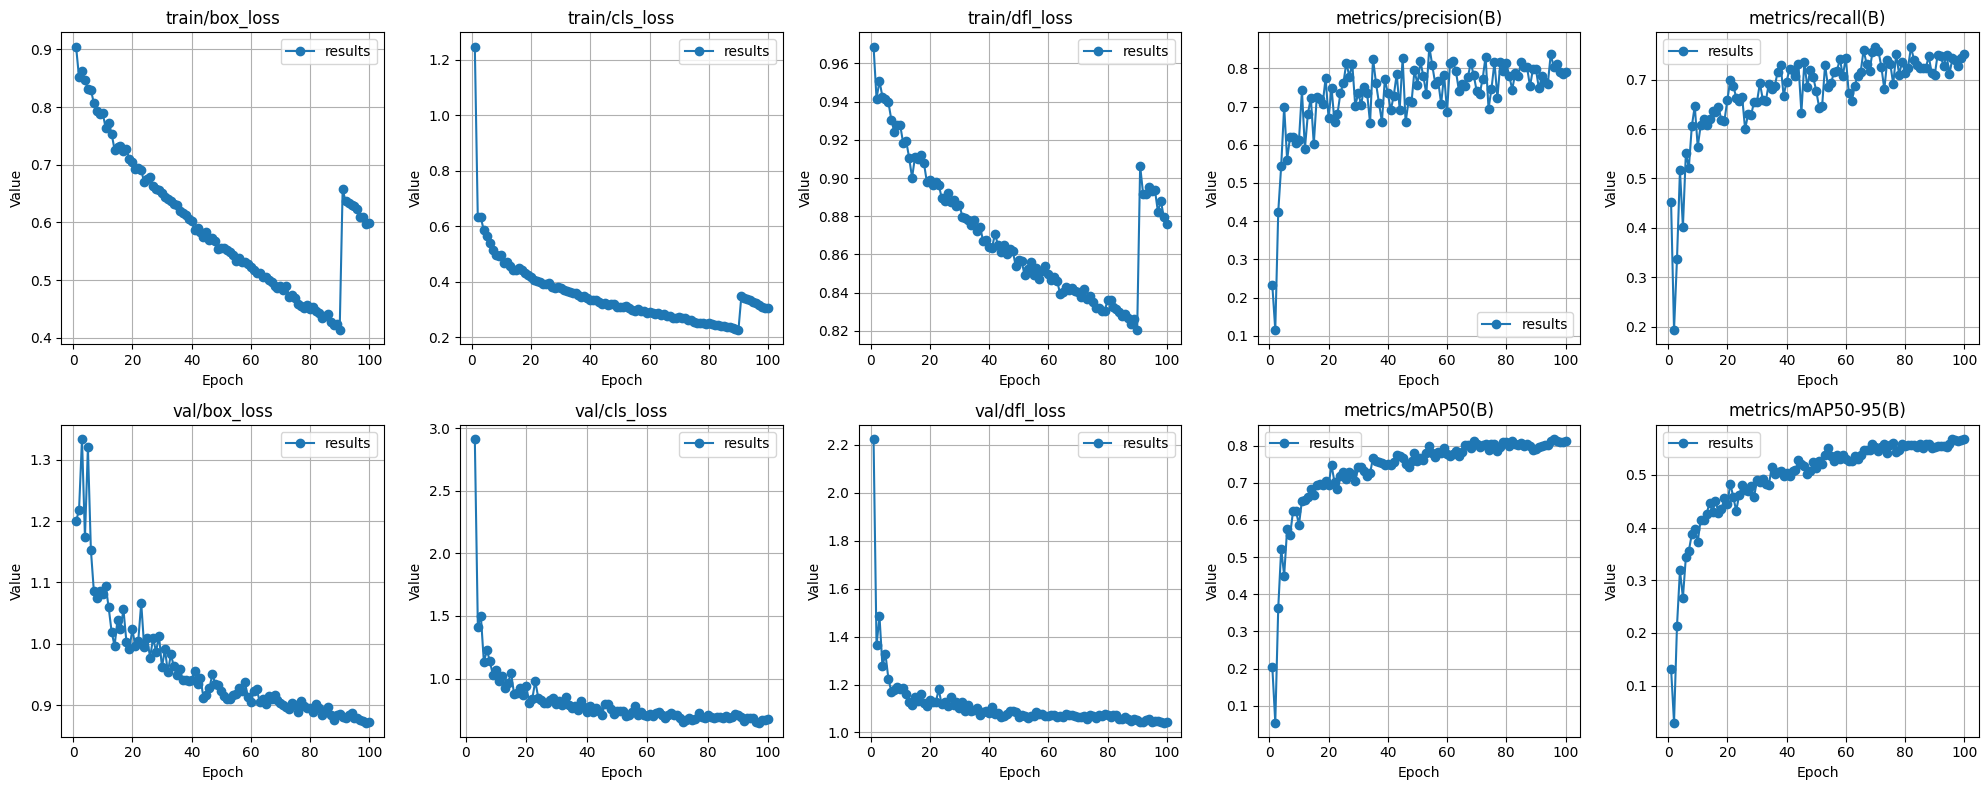

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with the path to your results.csv file
file_path = "/kaggle/working/runs/train/exp/results.csv"  # Update with the actual path

# Load the results data
data = pd.read_csv(file_path)

# Extract data for plotting
epochs = data['epoch']
precision = data['metrics/precision(B)']
recall = data['metrics/recall(B)']
map50 = data['metrics/mAP50(B)']
map50_95 = data['metrics/mAP50-95(B)']
train_box_loss = data['train/box_loss']
train_cls_loss = data['train/cls_loss']
train_dfl_loss = data['train/dfl_loss']
val_box_loss = data['val/box_loss']
val_cls_loss = data['val/cls_loss']
val_dfl_loss = data['val/dfl_loss']

# Plotting the graphs
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Row 1: Training metrics
axes[0].plot(epochs, train_box_loss, label='results', marker='o')
axes[0].set_title("train/box_loss")

axes[1].plot(epochs, train_cls_loss, label='results', marker='o')
axes[1].set_title("train/cls_loss")

axes[2].plot(epochs, train_dfl_loss, label='results', marker='o')
axes[2].set_title("train/dfl_loss")

axes[3].plot(epochs, precision, label='results', marker='o')
axes[3].set_title("metrics/precision(B)")

axes[4].plot(epochs, recall, label='results', marker='o')
axes[4].set_title("metrics/recall(B)")

# Row 2: Validation metrics
axes[5].plot(epochs, val_box_loss, label='results', marker='o')
axes[5].set_title("val/box_loss")

axes[6].plot(epochs, val_cls_loss, label='results', marker='o')
axes[6].set_title("val/cls_loss")

axes[7].plot(epochs, val_dfl_loss, label='results', marker='o')
axes[7].set_title("val/dfl_loss")

axes[8].plot(epochs, map50, label='results', marker='o')
axes[8].set_title("metrics/mAP50(B)")

axes[9].plot(epochs, map50_95, label='results', marker='o')
axes[9].set_title("metrics/mAP50-95(B)")

# Adjustments
for ax in axes:
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Value")
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()


In [3]:
from ultralytics import YOLO

# Path to your YOLO model file (e.g., a trained .pt model)
model_path = "/kaggle/input/results/best (2).pt"

# Load the YOLO model
model = YOLO(model_path)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


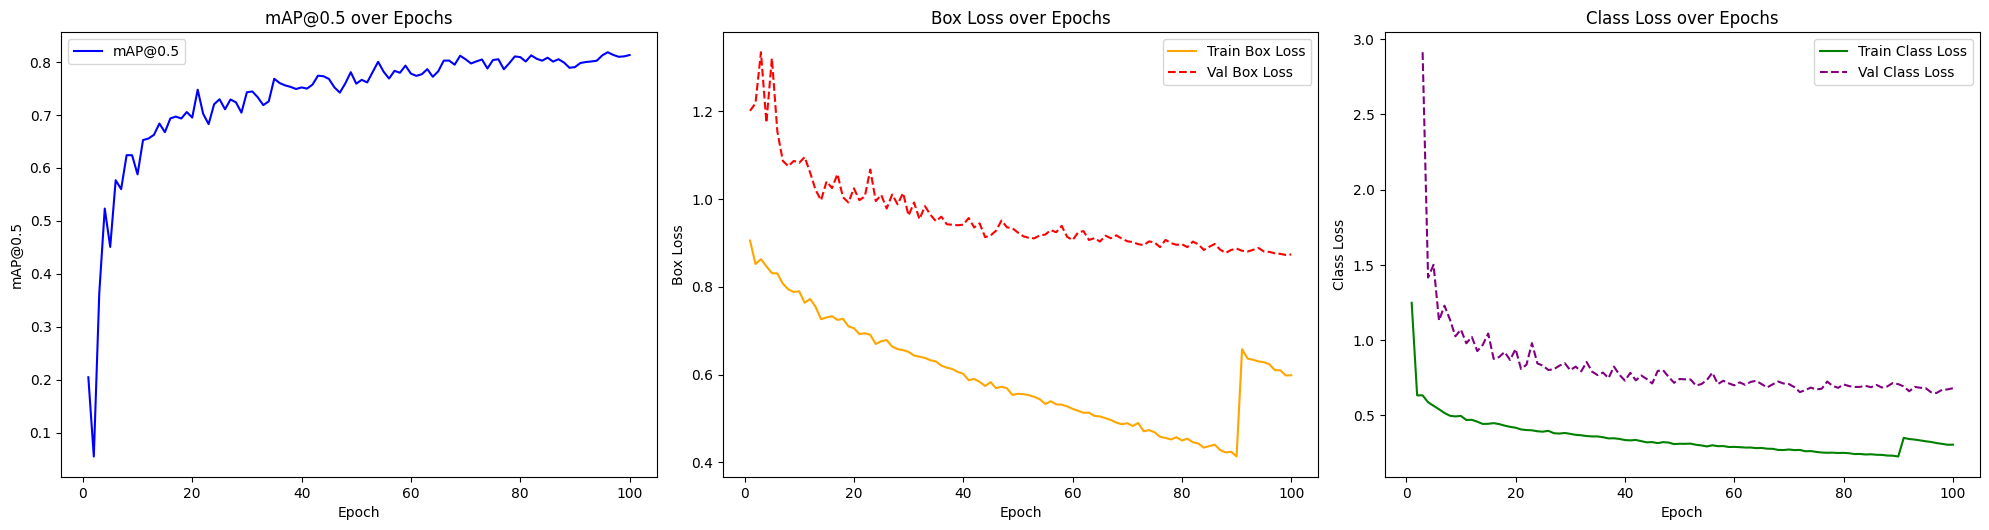

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
results = pd.read_csv('/kaggle/input/results/results.csv')

# Strip whitespace from column names
results.columns = results.columns.str.strip()

# Plotting
plt.figure(figsize=(20, 10))

# Subplot 1: mAP@0.5 over epochs
plt.subplot(2, 3, 1)
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@0.5', color='blue')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.title('mAP@0.5 over Epochs')
plt.legend()

# Subplot 2: Training and Validation Box Loss
plt.subplot(2, 3, 2)
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='orange')
plt.plot(results['epoch'], results['val/box_loss'], label='Val Box Loss', linestyle='--', color='red')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss over Epochs')
plt.legend()

# Subplot 3: Training and Validation Object Loss
plt.subplot(2, 3, 3)
plt.plot(results['epoch'], results['train/cls_loss'], label='Train Class Loss', color='green')
plt.plot(results['epoch'], results['val/cls_loss'], label='Val Class Loss', linestyle='--', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Class Loss')
plt.title('Class Loss over Epochs')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


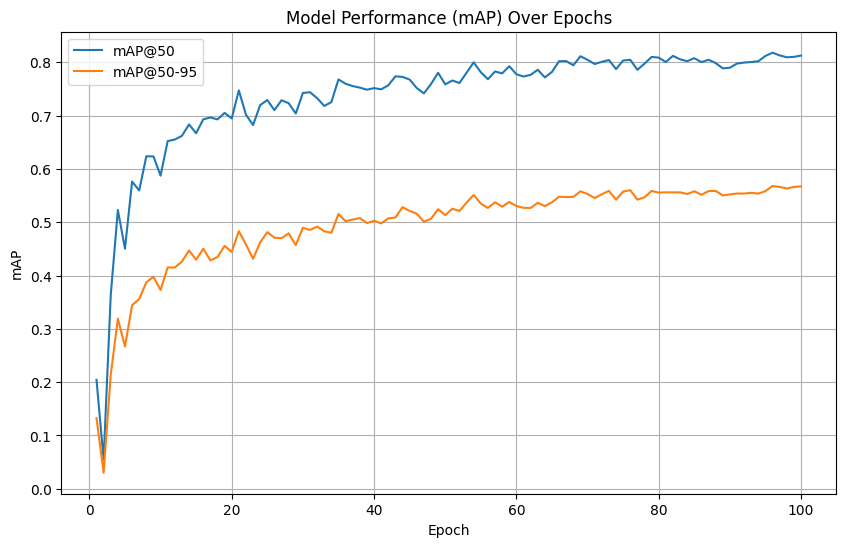

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results.csv file
df = pd.read_csv("/kaggle/input/results/results.csv")

# Plot mAP metrics
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95')
plt.title('Model Performance (mAP) Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the results.csv file
df = pd.read_csv('results.csv')

# Check available columns
print(df.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [5]:
import numpy as np

# Simulate recall values (0 to 1)
recall = np.linspace(0, 1, 100)

# Simulate precision values based on high mAP
average_precision = df['metrics/mAP50(B)'].max()  # Take the highest mAP value
precision = 1 - (1 - average_precision) * recall**2  # Simulate a curve

# Print the simulated mAP
print(f"Simulated Average Precision (mAP): {average_precision:.3f}")


Simulated Average Precision (mAP): 0.818


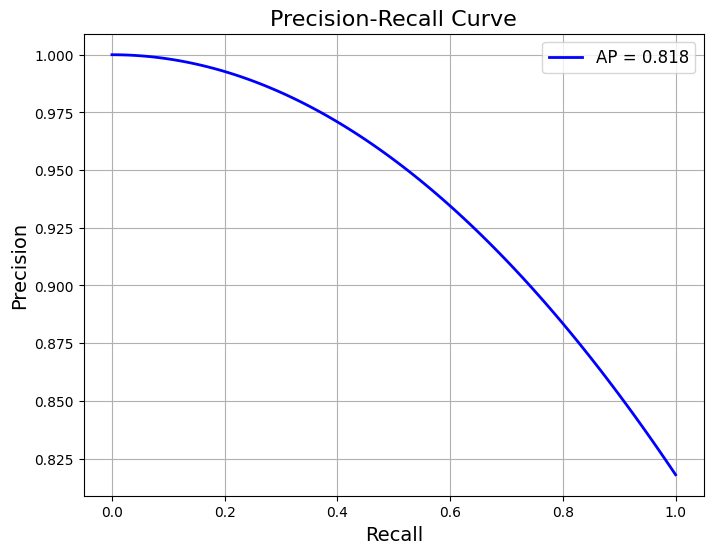

In [6]:
# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.3f}', color='blue', linewidth=2)

# Add labels, title, and legend
plt.title('Precision-Recall Curve', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
